## Importing Libraries

In [1]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import time
import os

## Downloading The Model

In [2]:
model = YOLO('Data/yolov8n.pt')

## Image Object Detection


image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\cars.png: 384x640 1 car, 1 truck, 115.7ms
Speed: 5.0ms preprocess, 115.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


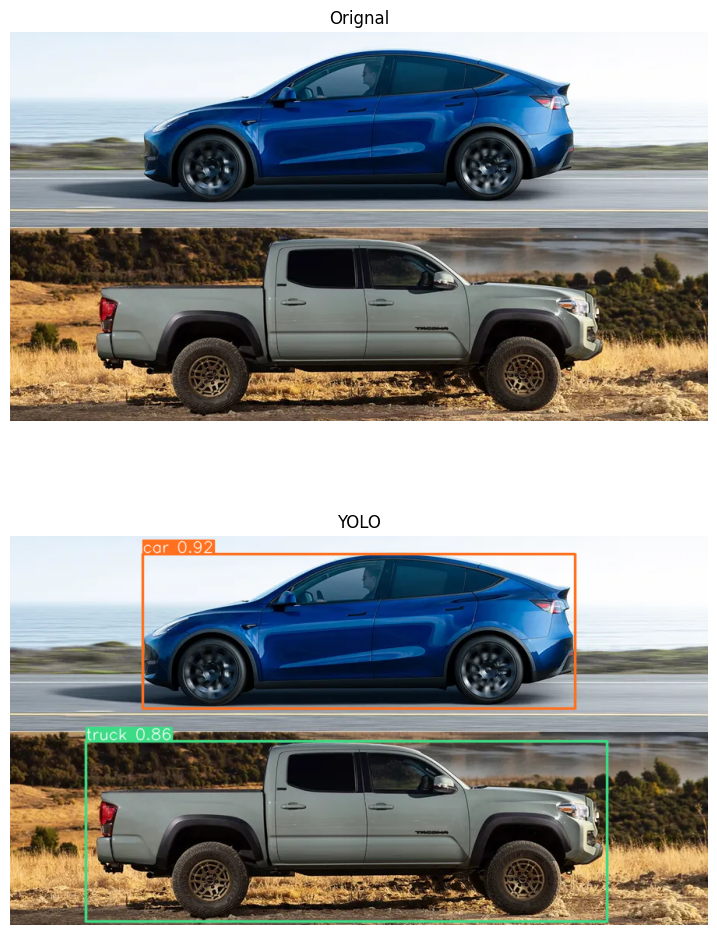

In [3]:
results = model("Data/cars.png")
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    
    plt.figure(figsize=(9,12))
    plt.subplot(2,1,1)
    img = Image.open("Data/cars.png")
    plt.imshow(img)
    plt.axis('off')
    plt.title("Orignal")
    
    plt.subplot(2,1,2)
    plt.imshow(im)
    plt.axis('off')
    plt.title("YOLO")
    
    plt.show()
    

#### Function to make it more accessible

In [4]:
def OpenImg(PATH):
    results = model(PATH)

    for r in results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])
        
        plt.figure(figsize=(9,12))
        plt.subplot(2,1,1)
        img = Image.open(PATH)
        plt.imshow(img)
        plt.axis('off')
        plt.title("Orignal")
    
        plt.subplot(2,1,2)
        plt.imshow(im)
        plt.axis('off')
        plt.title("YOLO")
    
        plt.show()


image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\fruits.png: 448x640 1 banana, 1 apple, 1 orange, 166.6ms
Speed: 4.0ms preprocess, 166.6ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


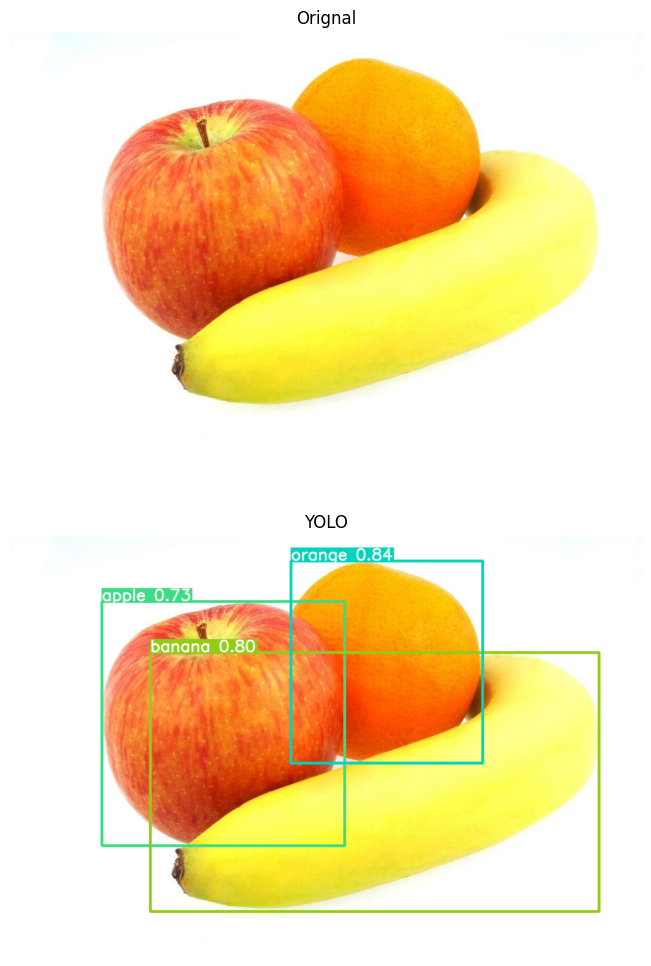

In [5]:
OpenImg("Data/fruits.png")

## Video Object Detection

In [6]:
# Initialize YOLO model
model = YOLO('Data/yolov5su.pt')

# Open the video file
video_capture = cv2.VideoCapture('Data/video.mp4')

# Check if the video opened successfully
if not video_capture.isOpened():
    print("Error: Couldn't open video file.")
    exit()

# Loop through each frame
while True:
    # Read a frame
    success, frame = video_capture.read()
    
    if not success:
        break
    
  
    # Get current time and add it as text to the frame
    current_time = str(time.ctime())
    cv2.putText(frame, current_time, (10, 20), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
    
    cv2.imwrite('Data/output_image.jpg', frame)
    
    # Process the frame using your model
    results = model('Data/output_image.jpg')
    for r in results:
        im_array = r.plot()
        cv2.imshow("processed", im_array)
        
    if cv2.waitKey(15) == 27:  # 27 represents the ESC key
        break

# Release the video capture object and close OpenCV windows
video_capture.release()
cv2.destroyAllWindows()
os.remove("Data/output_image.jpg") # Deleteing the temp img


image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 384x640 1 person, 2 cars, 1 truck, 198.5ms
Speed: 2.0ms preprocess, 198.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 384x640 1 person, 2 cars, 1 truck, 235.4ms
Speed: 6.0ms preprocess, 235.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 384x640 1 person, 2 cars, 1 truck, 234.4ms
Speed: 3.0ms preprocess, 234.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 384x640 1 person, 2 cars, 1 truck, 255.3ms
Speed: 3.0ms preprocess, 255.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 384x640 1 person, 2 cars, 1 truck, 197.5ms
Speed: 3.0ms preprocess, 197.5ms infer

## Camera Object Detection

In [7]:
# Initialize YOLO model
model = YOLO('Data/yolov5su.pt')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
    current_time = str(time.ctime())
    cv2.putText(frame, current_time, (10, 20), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
    
    # Save each frame with a unique filename
   
    cv2.imwrite('Data/output_image.jpg', frame)
    
    # Process the frame using your model
    results = model('Data/output_image.jpg')
    for r in results:
        im_array = r.plot()
        cv2.imshow("processed", im_array)
    
    if cv2.waitKey(15) == 27:  # 27 represents the ESC key
        break
        
cap.release()
cv2.destroyAllWindows()
os.remove("Data/output_image.jpg")  # Deleteing the temp img


image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 480x640 1 person, 215.6ms
Speed: 2.0ms preprocess, 215.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 480x640 1 person, 242.9ms
Speed: 4.0ms preprocess, 242.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 480x640 1 person, 251.4ms
Speed: 1.0ms preprocess, 251.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 480x640 1 person, 223.4ms
Speed: 3.0ms preprocess, 223.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 D:\Jupyter\Object Detection By YOLO8\Data\output_image.jpg: 480x640 1 person, 220.5ms
Speed: 1.0ms preprocess, 220.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
